In [1]:
# importing dependencies
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [2]:
# storing the dataset
data = pd.read_csv('/kaggle/input/star-dataset/6 class csv.csv')

Let's begin by taking a look at the data and its formatting.

In [3]:
# previewing the dataset
data.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


From this table, we can immediately see that there are two categorical features: Star color, and spectral class. Before we can proceed any further, let's use labelencoder to transform these into numerical values.

In [4]:
# encode categorical types
for column in ['Star color', 'Spectral Class']:
    data[column] = LabelEncoder().fit_transform(data[column])

Now we can confirm that the dataset is in accordance with your expectation.

In [5]:
# preview the revised dataset
data.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,10,5
1,3042,0.000500,0.1542,16.60,0,10,5
2,2600,0.000300,0.1020,18.70,0,10,5
3,2800,0.000200,0.1600,16.65,0,10,5
4,1939,0.000138,0.1030,20.06,0,10,5


I think it would also be interesting to see a satistical rundown of the data.

In [6]:
# quick statistical rundown of the data
data.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000,7.250000,3.758333
std,9552.425037,179432.244940,517.155763,10.532512,1.711394,4.926659,2.090007
min,1939.000000,0.000080,0.008400,-11.920000,0.000000,0.000000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000,2.000000,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000,10.000000,5.000000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000,10.000000,5.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000,18.000000,6.000000


I would like to build a model that accurately predicts the temperature of a star based on its other features. Let's begin by analyzing the relationships between temperature and each of the other features in isolation.

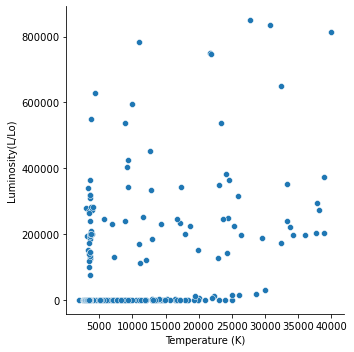

In [7]:
# view the relationship between temperature and luminosity
sns.relplot(x='Temperature (K)', y='Luminosity(L/Lo)', data=data)

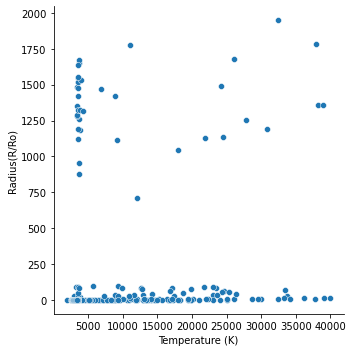

In [8]:
# view the relationship between temperature and radius
sns.relplot(x='Temperature (K)', y='Radius(R/Ro)', data=data)

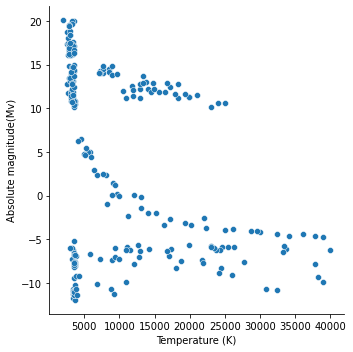

In [9]:
# view the relationship between temperature and absolute magnitude
sns.relplot(x='Temperature (K)', y='Absolute magnitude(Mv)', data=data)

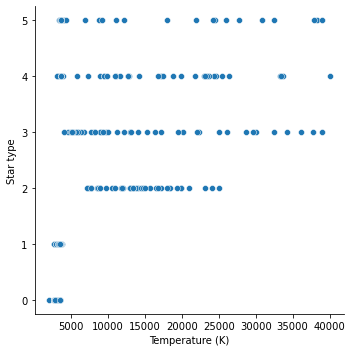

In [10]:
# view the relationship between temperature and star type
sns.relplot(x='Temperature (K)', y='Star type', data=data)

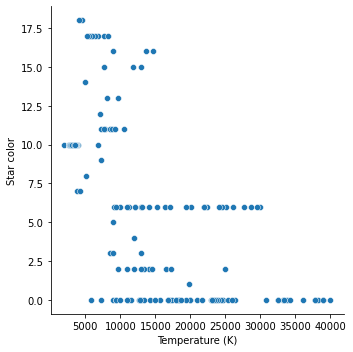

In [11]:
# view the relationship between temperature and star color
sns.relplot(x='Temperature (K)', y='Star color', data=data)

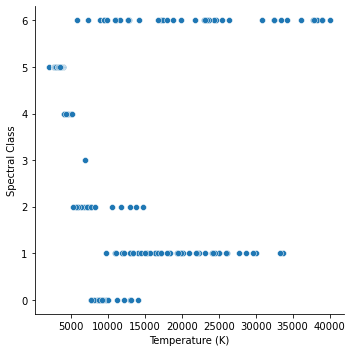

In [12]:
# view the relationship between temperature and spectral class
sns.relplot(x='Temperature (K)', y='Spectral Class', data=data)

Now that we've seen the individual relationships of each of the features with temperature, let's try to identify the features that are the most important in predicting the temperature.

In [13]:
# split the data into training and target data
train = data.drop('Temperature (K)', axis=1)
test = data['Temperature (K)']

In [14]:
# further split the data into training dataset and testing dataset
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.2)

[0.28585603 0.29234858 0.30420351 0.02428288 0.05170261 0.04160639]


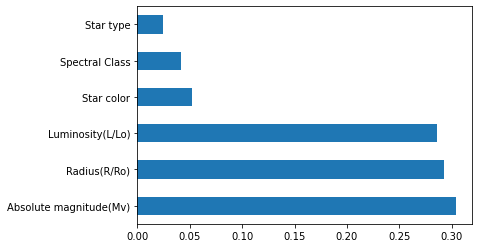

In [15]:
# measure feature importance for training data
model = ExtraTreesClassifier()
model.fit(X_train,y_train)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

From this we can see that the radius, absolute magnitude, and luminosity are the features that are most important in identifying the temperature of a star. Rather interesting to see actually...

In [16]:
# build a predictive model using linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [17]:
# check the accuracy of our predictive model
lr.score(X_test,y_test)

0.6872271543251307

Our linear regression model was able to predict the temperature with an accuracy of roughly 70%. Considering temperature is a continuous measurement, this satisfies my expectations, although I will continue to try to improve the accuracy of the model. Since these tests revolved around a continuous measurement, I thought I would also try to produce a model that would rely on a discrete set of responses. This should lead to a higher prediction accuracy and I am curious to see how much better it will be.

In [18]:
# prepare data for predicting star type
train = data.drop('Star type', axis=1)
test = data['Star type']
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.2)


In [19]:
# use a logistic regression to predict star type
logr = LogisticRegression(max_iter=10000)
logr.fit(X_train, y_train)
logr.score(X_test, y_test)

0.9791666666666666

It appears that our hypothesis was indeed correct. The model was able to produce the star type predictions with 100% accuracy, much to my surpise. It's quite exhilirating to see.